# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={units}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
          #make api request
        response = requests.get(city_url)
        
    # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]                           
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | rikaze
Processing Record 5 of Set 1 | timimoun
Processing Record 6 of Set 1 | tsiombe
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | xilin hot
Processing Record 9 of Set 1 | ambon
Processing Record 10 of Set 1 | palmer
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | northam
Processing Record 15 of Set 1 | bereznik
Processing Record 16 of Set 1 | saipan
Processing Record 17 of Set 1 | thunder bay
Processing Record 18 of Set 1 | palembang
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 21 of Set 1 | albany
Processing Record 22 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,29.93,80,20,4.61,CA,1695001260
1,papatowai,-46.5619,169.4708,48.94,70,60,23.67,NZ,1695001260
2,rikaze,29.2500,88.8833,55.40,43,100,3.42,CN,1695001260
3,timimoun,29.2639,0.2310,86.38,30,97,13.80,DZ,1695001260
4,tsiombe,-25.3000,45.4833,67.93,94,62,7.58,MG,1695001261


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,29.93,80,20,4.61,CA,1695001260
1,papatowai,-46.5619,169.4708,48.94,70,60,23.67,NZ,1695001260
2,rikaze,29.2500,88.8833,55.40,43,100,3.42,CN,1695001260
3,timimoun,29.2639,0.2310,86.38,30,97,13.80,DZ,1695001260
4,tsiombe,-25.3000,45.4833,67.93,94,62,7.58,MG,1695001261


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

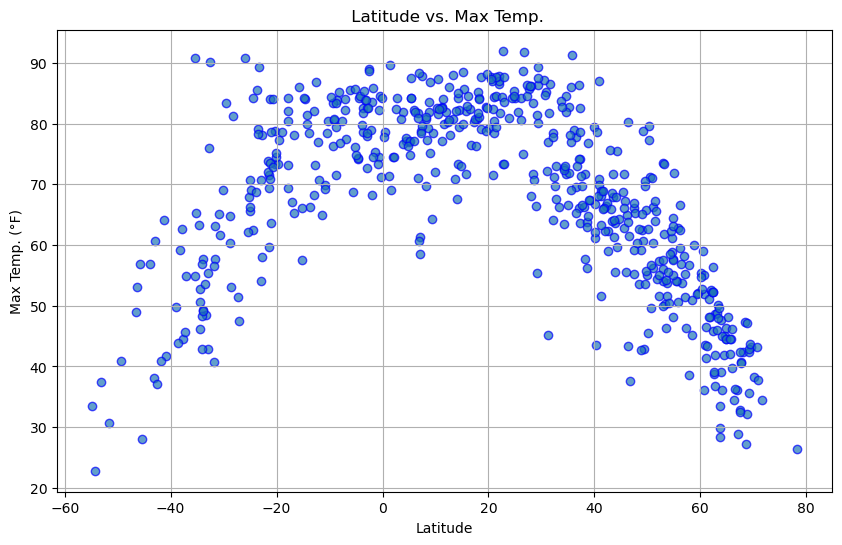

In [8]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(10, 6))

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="blue", alpha=0.7)

#customize plot
plt.title (" Latitude vs. Max Temp.")
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (°F)")
plt.grid(True)

# Incorporate the other graph properties



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

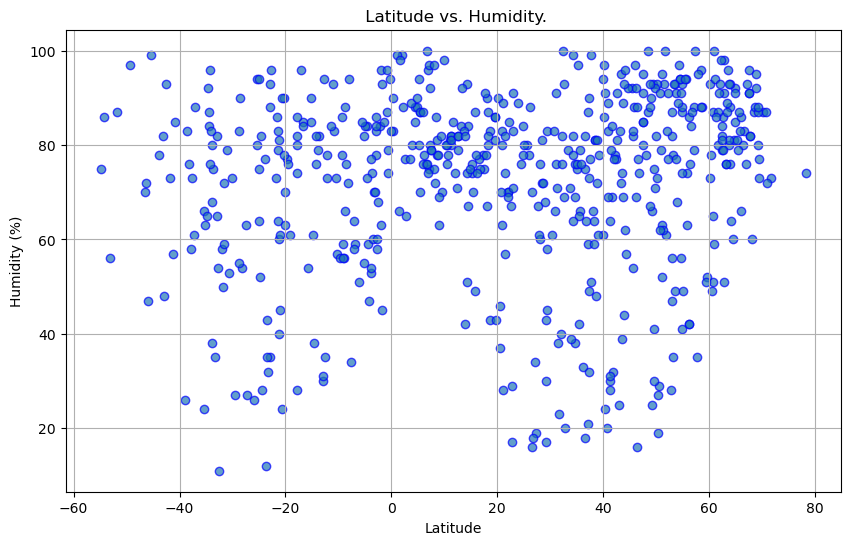

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="blue", alpha=0.7)

#customize plot
plt.title (" Latitude vs. Humidity.")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

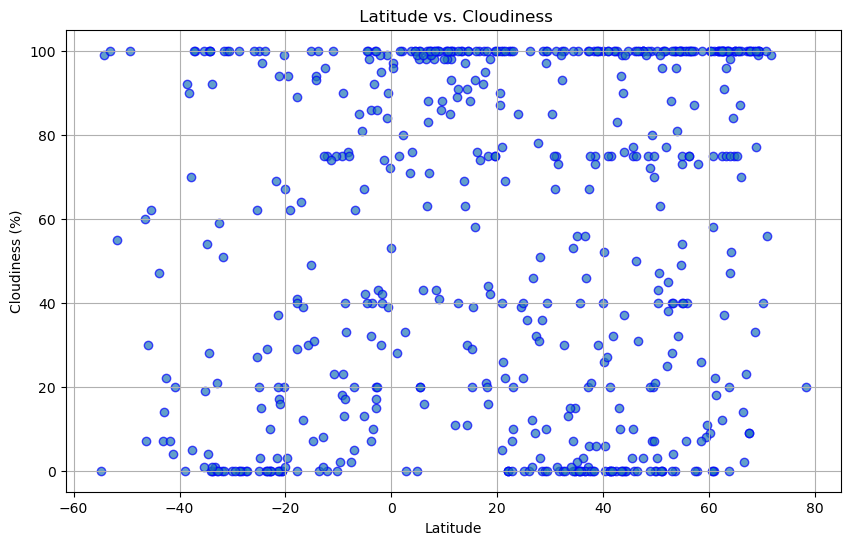

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="blue", alpha=0.7)

#customize plot
plt.title (" Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

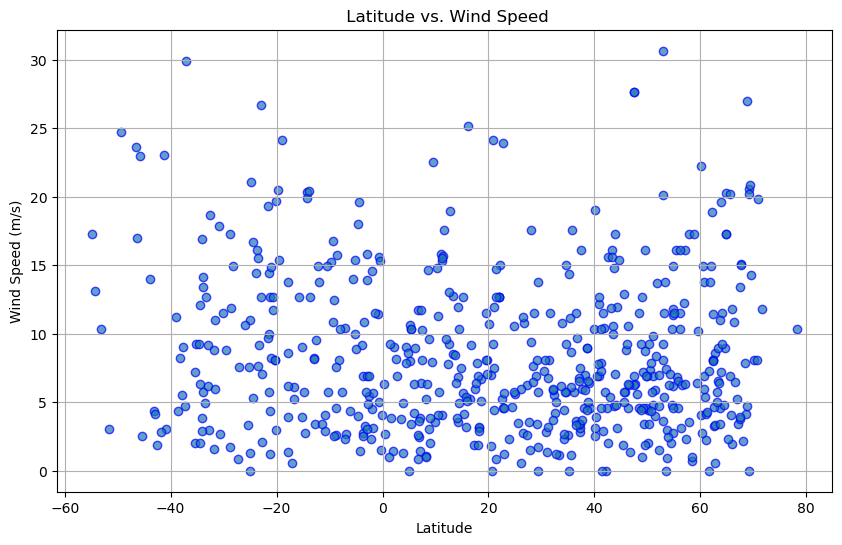

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="blue", alpha=0.7)

#customize plot
plt.title (" Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression( x_values, y_values, x_label, y_label, title, text_coordinates):
    (slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)
    #calculaate regression
    regress_values = x_values*slope+intercept

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,29.93,80,20,4.61,CA,1695001260
2,rikaze,29.2500,88.8833,55.40,43,100,3.42,CN,1695001260
3,timimoun,29.2639,0.2310,86.38,30,97,13.80,DZ,1695001260
6,xilin hot,43.9667,116.0333,63.63,44,76,17.31,CN,1695001261
8,palmer,42.1584,-72.3287,66.43,78,100,0.00,US,1695001262


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papatowai,-46.5619,169.4708,48.94,70,60,23.67,NZ,1695001260
4,tsiombe,-25.3000,45.4833,67.93,94,62,7.58,MG,1695001261
5,port-aux-francais,-49.3500,70.2167,40.89,97,100,24.74,TF,1695001261
7,ambon,-3.6954,128.1814,82.54,74,40,6.91,ID,1695001261
10,saint-philippe,-21.3585,55.7679,69.39,79,37,9.98,RE,1695001262


###  Temperature vs. Latitude Linear Regression Plot

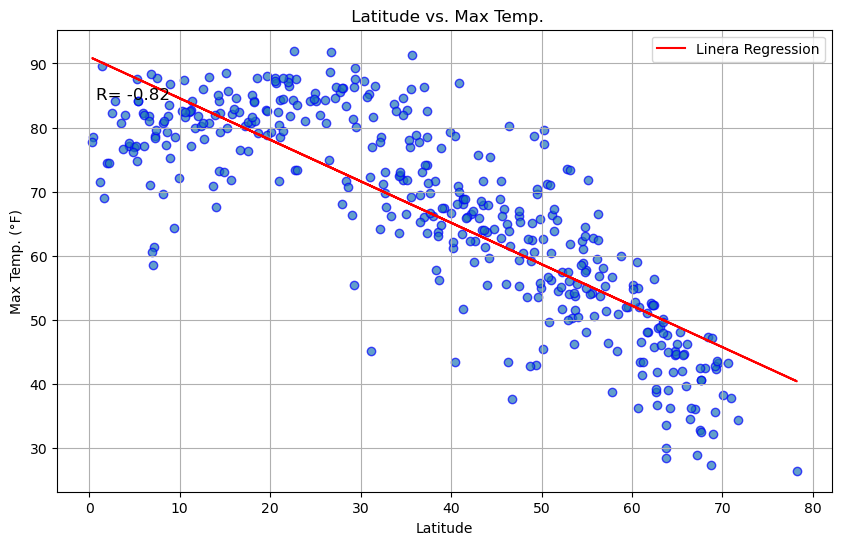

In [15]:
# Linear regression on Northern Hemisphere

plt.figure(figsize=(10, 6))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolor="blue", alpha=0.7)
correlation = round(northern_hemi_df["Lat"].corr(northern_hemi_df["Max Temp"]), 2)
#customize plot
plt.title (" Latitude vs. Max Temp.")
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (°F)")
plt.grid(True)

#define x & y
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# perform linerar and regression values
(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept

plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label="Linera Regression")

plt.annotate(f"R= {correlation}", xy=(0.05, 0.85), xycoords="axes fraction", fontsize=12, color="black")
plt.legend()

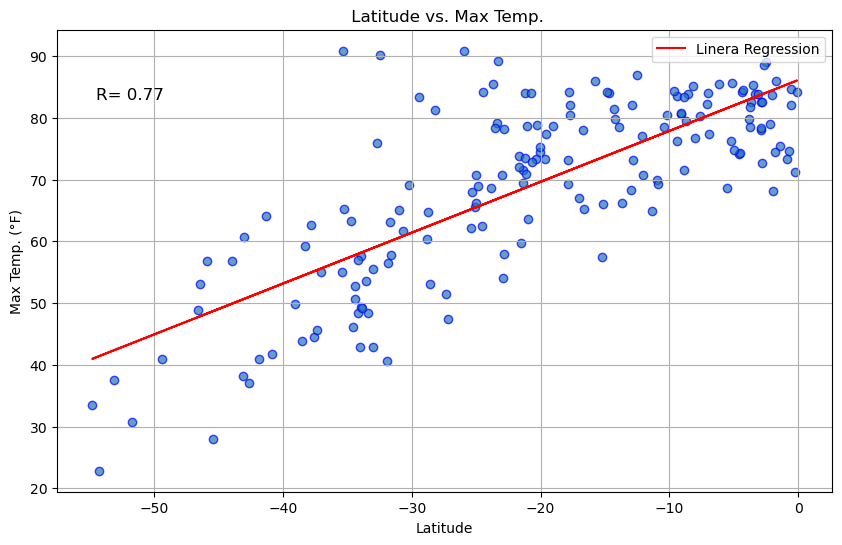

In [16]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(10, 6))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", edgecolor="blue", alpha=0.7)
correlation = round(southern_hemi_df["Lat"].corr(southern_hemi_df["Max Temp"]), 2)
#customize plot
plt.title (" Latitude vs. Max Temp.")
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (°F)")
plt.grid(True)

#define x & y
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# perform linerar and regression values
(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept

plt.plot(southern_hemi_df["Lat"], regress_values, "r-", label="Linera Regression")

plt.annotate(f"R= {correlation}", xy=(0.05, 0.85), xycoords="axes fraction", fontsize=12, color="black")
plt.legend()

**Discussion about the linear relationship:** The further we go from the equator the colder the temperature becomes. The linear regression line confirms the negative relationship between latitude and maximum temperature in the northern hemisphere. That being said, the opposite is true in the southern hemisphere. The relationship shown by the linear regression is that as we move closer to the equator the warmer the temperature gets showing a positive relationship between latitude and maximum temperature. In the northern hemisphere, the correlation coefficient is close to -.7 vs. the southern hemisphere where it is close to .7.

### Humidity vs. Latitude Linear Regression Plot

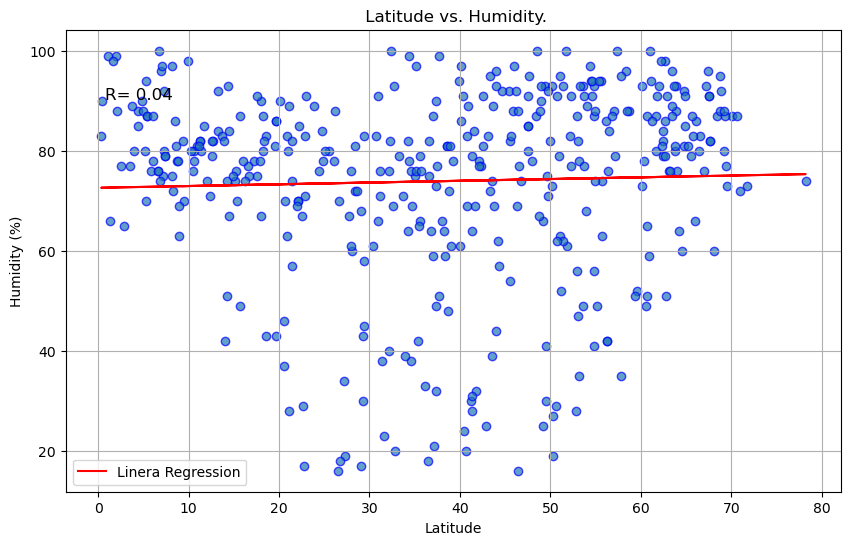

In [17]:
# Northern Hemisphere
plt.figure(figsize=(10, 6))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolor="blue", alpha=0.7)
correlation = round(northern_hemi_df["Lat"].corr(northern_hemi_df["Humidity"]), 2)
#customize plot
plt.title (" Latitude vs. Humidity.")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#define x & y
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# perform linerar and regression values
(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept

plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label="Linera Regression")

plt.annotate(f"R= {correlation}", xy=(0.05, 0.85), xycoords="axes fraction", fontsize=12, color="black")
plt.legend()

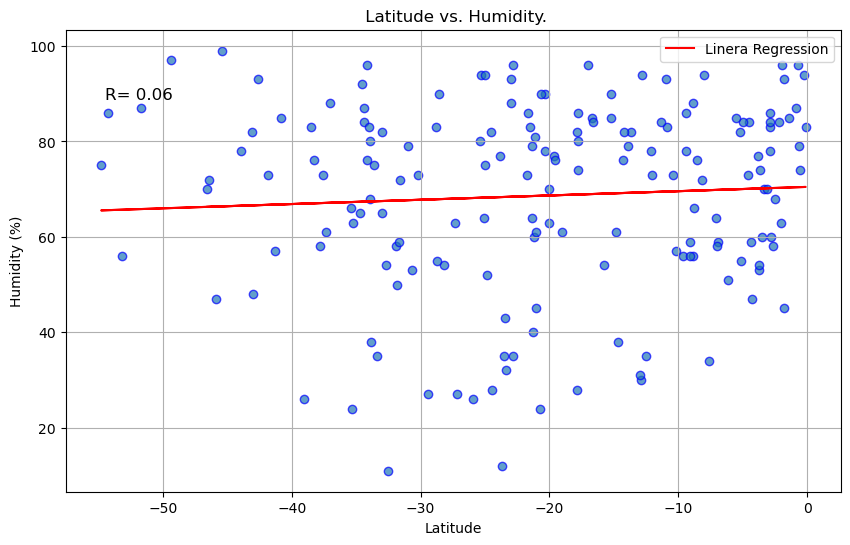

In [18]:
# Southern Hemisphere
plt.figure(figsize=(10, 6))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolor="blue", alpha=0.7)
correlation = round(southern_hemi_df["Lat"].corr(southern_hemi_df["Humidity"]), 2)
#customize plot
plt.title (" Latitude vs. Humidity.")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#define x & y
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# perform linerar and regression values
(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept

plt.plot(southern_hemi_df["Lat"], regress_values, "r-", label="Linera Regression")

plt.annotate(f"R= {correlation}", xy=(0.05, 0.85), xycoords="axes fraction", fontsize=12, color="black")
plt.legend()

**Discussion about the linear relationship:**  For the northern and southern hemispheres, there is a weak to non-existent linear relationship. While the plots provide valuable insight. It is not a reliable indicator of humidity levels when comparing to latitude alone.

### Cloudiness vs. Latitude Linear Regression Plot

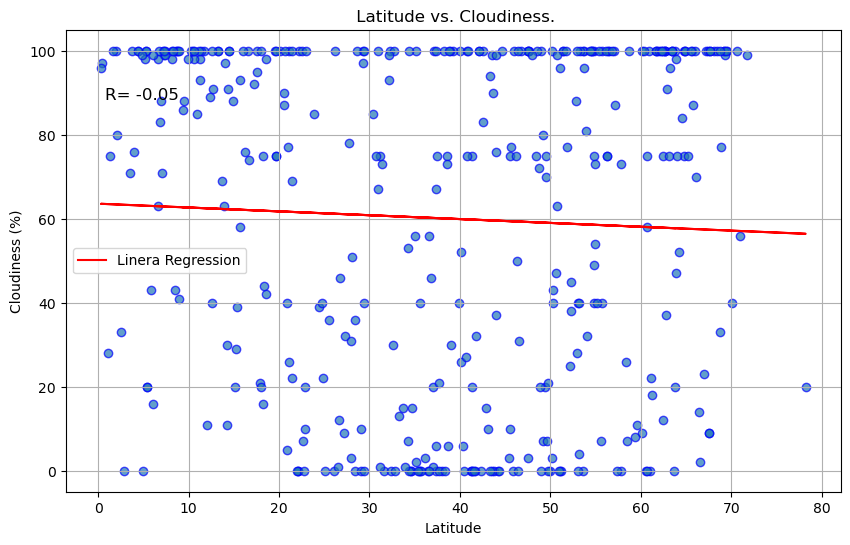

In [19]:
# Northern Hemisphere
plt.figure(figsize=(10, 6))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolor="blue", alpha=0.7)
correlation = round(northern_hemi_df["Lat"].corr(northern_hemi_df["Cloudiness"]), 2)
#customize plot
plt.title (" Latitude vs. Cloudiness.")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#define x & y
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# perform linerar and regression values
(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept

plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label="Linera Regression")

plt.annotate(f"R= {correlation}", xy=(0.05, 0.85), xycoords="axes fraction", fontsize=12, color="black")
plt.legend()

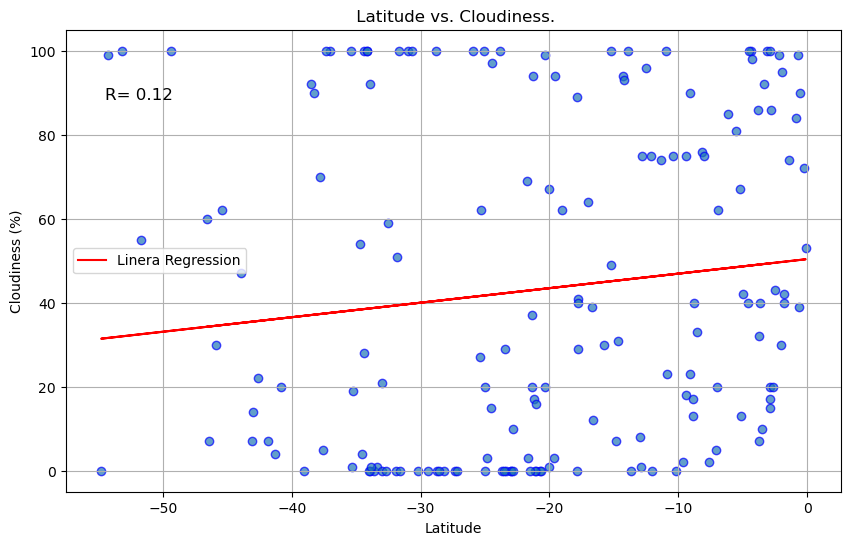

In [20]:
# Southern Hemisphere
plt.figure(figsize=(10, 6))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolor="blue", alpha=0.7)
correlation = round(southern_hemi_df["Lat"].corr(southern_hemi_df["Cloudiness"]), 2)
#customize plot
plt.title (" Latitude vs. Cloudiness.")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#define x & y
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# perform linerar and regression values
(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept

plt.plot(southern_hemi_df["Lat"], regress_values, "r-", label="Linera Regression")

plt.annotate(f"R= {correlation}", xy=(0.05, 0.85), xycoords="axes fraction", fontsize=12, color="black")
plt.legend()

**Discussion about the linear relationship:** Just like with humidity latitude alone is unable to be a reliable predictor of cloudiness levels. There is not a strong relationship in the northern or southern hemispheres between latitude and cloudiness. The linear regression in both northern and southern does not fit the data well.

### Wind Speed vs. Latitude Linear Regression Plot

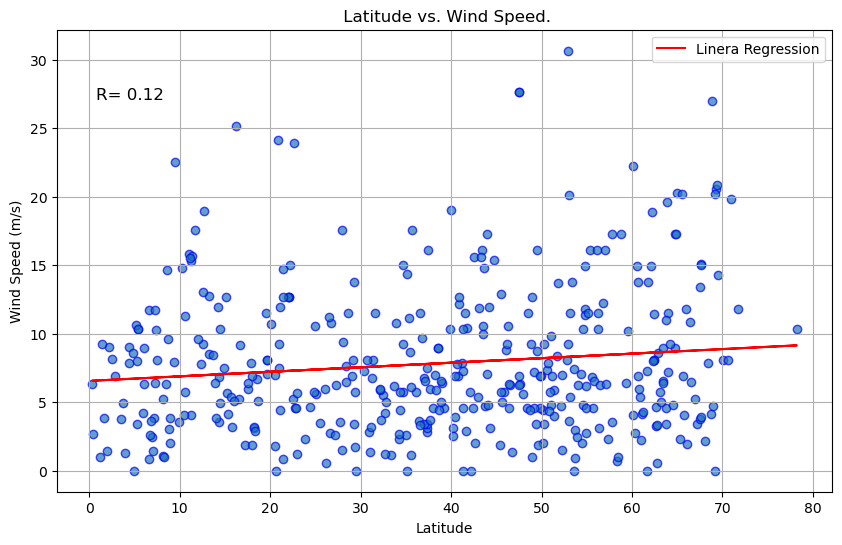

In [21]:
# Northern Hemisphere
plt.figure(figsize=(10, 6))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolor="blue", alpha=0.7)
correlation = round(northern_hemi_df["Lat"].corr(northern_hemi_df["Wind Speed"]), 2)
#customize plot
plt.title (" Latitude vs. Wind Speed.")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

#define x & y
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# perform linerar and regression values
(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept

plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label="Linera Regression")

plt.annotate(f"R= {correlation}", xy=(0.05, 0.85), xycoords="axes fraction", fontsize=12, color="black")
plt.legend()

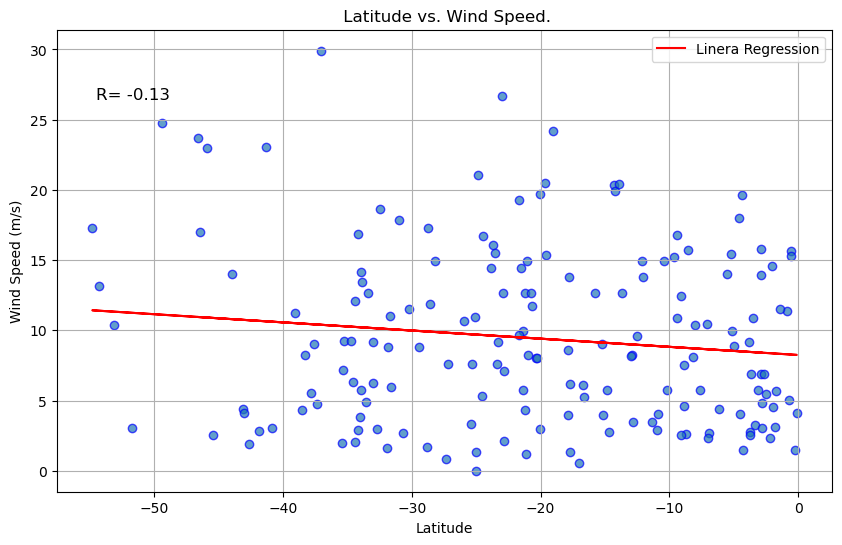

In [22]:
# Southern Hemisphere
plt.figure(figsize=(10, 6))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolor="blue", alpha=0.7)
correlation = round(southern_hemi_df["Lat"].corr(southern_hemi_df["Wind Speed"]), 2)
#customize plot
plt.title (" Latitude vs. Wind Speed.")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

#define x & y
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# perform linerar and regression values
(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept

plt.plot(southern_hemi_df["Lat"], regress_values, "r-", label="Linera Regression")

plt.annotate(f"R= {correlation}", xy=(0.05, 0.85), xycoords="axes fraction", fontsize=12, color="black")
plt.legend()

**Discussion about the linear relationship:** In the northern hemisphere, there is a weak negative linear relationship between lat and windspeed with a -.19. While in the southern hemisphere there is also a weak negative linear relationship of -.26.